In [49]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter

In [50]:
# Variables
start_date = '1928-01-01'
end_date = '2024-07-01'
ticker_symbol = '^GSPC'
start_month = 6
end_month = 7
vertical_line_date = '2023-06-30'

In [51]:
# Data acquisition and processing
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500 = sp500.reset_index()

sp500['Prev_Close'] = sp500.groupby(sp500.Date.dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100

sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day

sp500_june_july = sp500[(sp500['Month'] >= start_month) & (sp500['Month'] <= end_month)]

avg_returns = sp500_june_july.groupby(['Month', 'Day'])['Return'].mean().reset_index()

avg_returns['Date'] = pd.to_datetime('2023-' + avg_returns['Month'].astype(str) + '-' + avg_returns['Day'].astype(str))
avg_returns = avg_returns.sort_values('Date')

[*********************100%%**********************]  1 of 1 completed


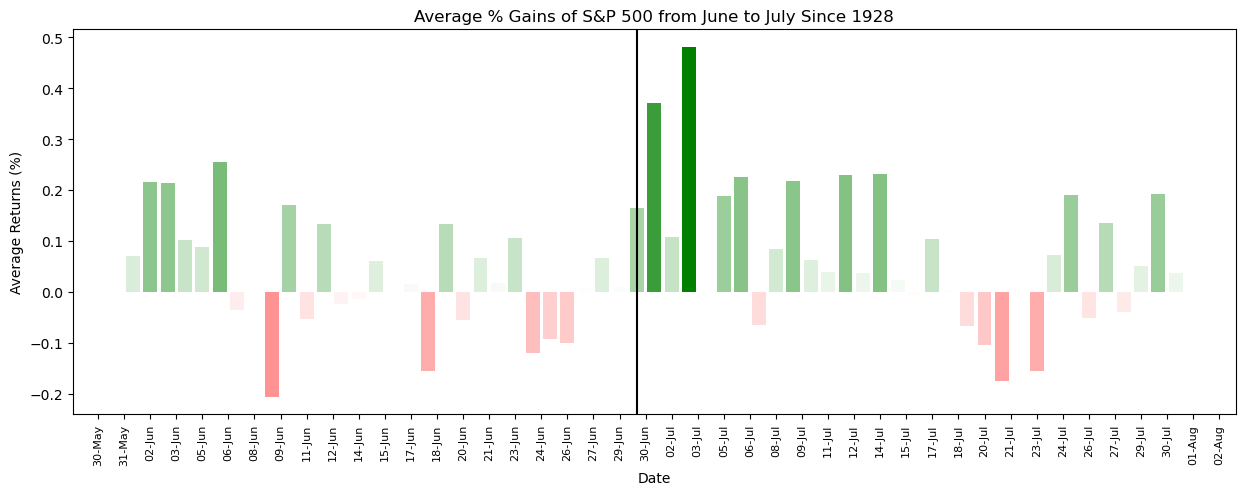

In [52]:
# Plotting
vmax = avg_returns['Return'].abs().max()
cmap = colors.LinearSegmentedColormap.from_list("", ["red","white","green"])
norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

fig, ax = plt.subplots(figsize=(15, 5))

bar = ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))

ax.axvline(pd.to_datetime(vertical_line_date), color='black')

ax.set_xlabel('Date')
ax.set_ylabel('Average Returns (%)')
ax.set_title('Average % Gains of S&P 500 from {} to {} Since 1928'.format(
    pd.to_datetime('2023-' + str(start_month) + '-01').strftime('%B'), 
    pd.to_datetime('2023-' + str(end_month) + '-01').strftime('%B')))

ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=len(avg_returns['Date'])))
date_format = DateFormatter("%d-%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90, fontsize=8)

plt.show()

In [53]:
# Checking april and may 
start_month = 4
end_month = 5
vertical_line_date = '2023-04-30'

In [54]:
# Data acquisition and processing
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500 = sp500.reset_index()

sp500['Prev_Close'] = sp500.groupby(sp500.Date.dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100

sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day

sp500_june_july = sp500[(sp500['Month'] >= start_month) & (sp500['Month'] <= end_month)]

avg_returns = sp500_june_july.groupby(['Month', 'Day'])['Return'].mean().reset_index()

avg_returns['Date'] = pd.to_datetime('2023-' + avg_returns['Month'].astype(str) + '-' + avg_returns['Day'].astype(str))
avg_returns = avg_returns.sort_values('Date')

[*********************100%%**********************]  1 of 1 completed


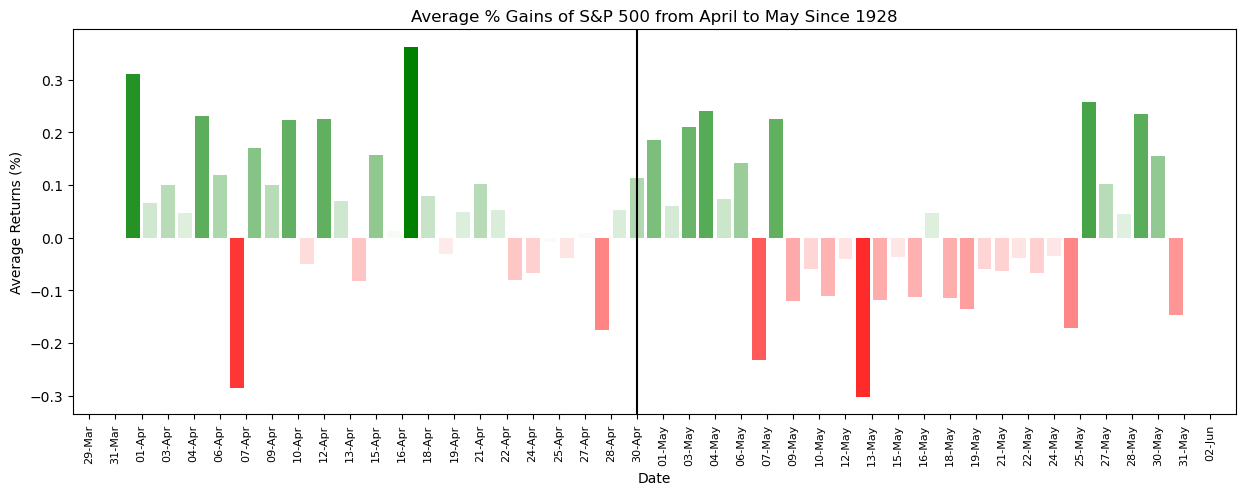

In [55]:
# Plotting
vmax = avg_returns['Return'].abs().max()
cmap = colors.LinearSegmentedColormap.from_list("", ["red","white","green"])
norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

fig, ax = plt.subplots(figsize=(15, 5))

bar = ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))

ax.axvline(pd.to_datetime(vertical_line_date), color='black')

ax.set_xlabel('Date')
ax.set_ylabel('Average Returns (%)')
ax.set_title('Average % Gains of S&P 500 from {} to {} Since 1928'.format(
    pd.to_datetime('2023-' + str(start_month) + '-01').strftime('%B'), 
    pd.to_datetime('2023-' + str(end_month) + '-01').strftime('%B')))

ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=len(avg_returns['Date'])))
date_format = DateFormatter("%d-%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90, fontsize=8)

plt.show()

[*********************100%%**********************]  1 of 1 completed
/var/folders/k1/msnjftv54q1bx0fd4lkhcdfw0000gn/T/ipykernel_16974/1201853337.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_jan['Date'] = sp500_jan['Date'] - pd.DateOffset(years=1)


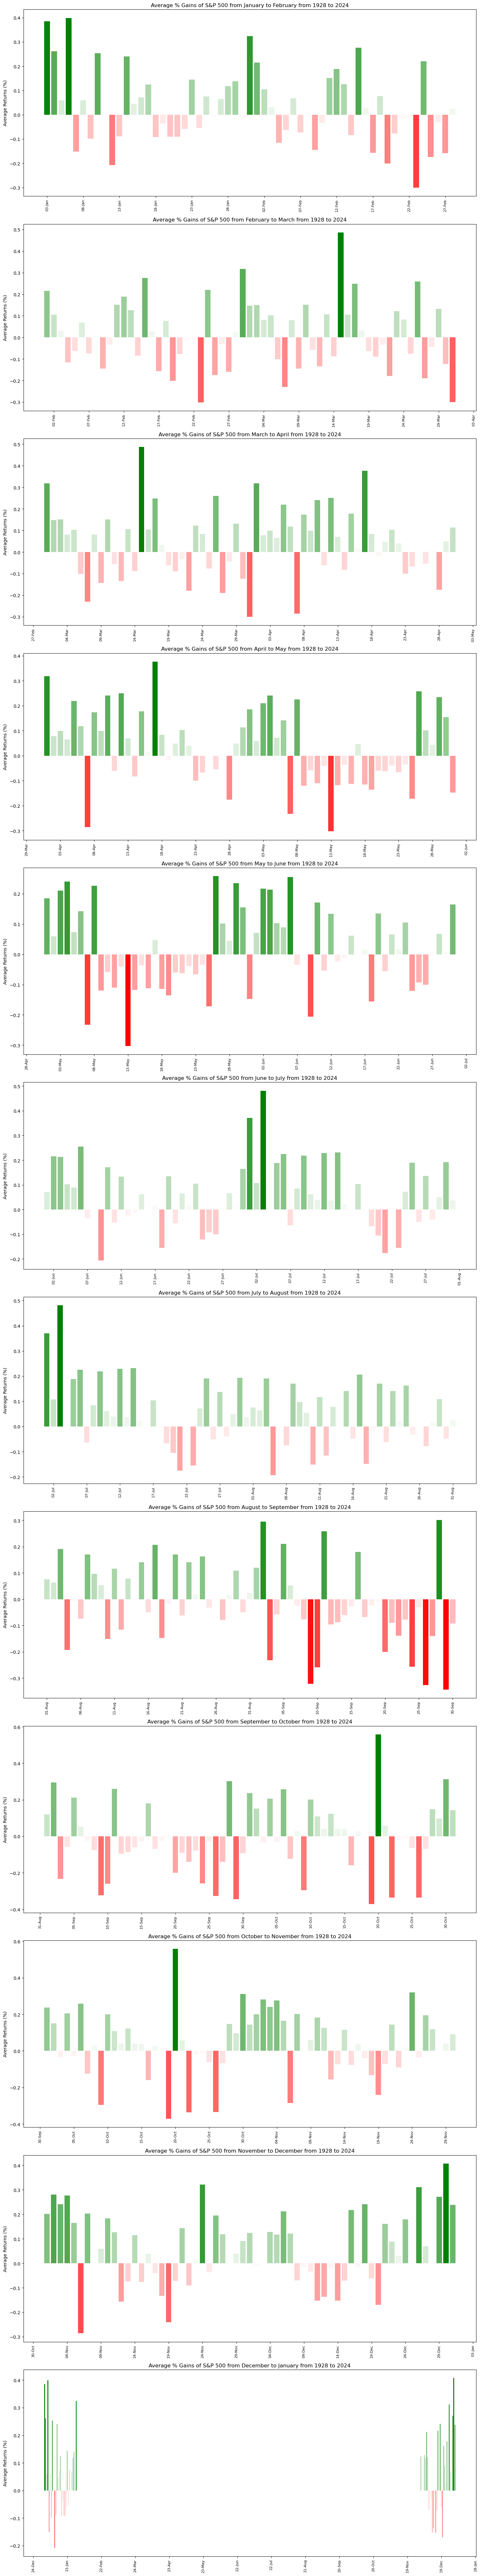

In [56]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec


end_date = '2024-02-02'
ticker_symbol = '^GSPC'
# Data acquisition and processing
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500 = sp500.reset_index()
sp500['Prev_Close'] = sp500.groupby(sp500.Date.dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100
sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day

# Initialize the figure
fig = plt.figure(figsize=(15, 80))
gs = gridspec.GridSpec(12, 1) 

# Generating 12 subplots for each month pair
for i in range(12):  
    start_month = i + 1
    end_month = start_month % 12 + 1
    if i == 11:  # If it's the last loop iteration for December-January
        # Get December data from previous year and January data from current year
        sp500_dec = sp500[(sp500['Month'] == 12) & (sp500['Date'].dt.year == 2022)]
        sp500_jan = sp500[(sp500['Month'] == 1) & (sp500['Date'].dt.year == 2023)]
        # Temporarily adjust the year for January to make it contiguous with December
        sp500_jan['Date'] = sp500_jan['Date'] - pd.DateOffset(years=1)
        # Combine December and January data
        sp500_monthly = pd.concat([sp500_dec, sp500_jan])
    else:
        start_month = i + 1
        end_month = start_month % 12 + 1
        sp500_monthly = sp500[(sp500['Month'] == start_month) | (sp500['Month'] == end_month)]

    # Corrected to calculate avg_returns inside the loop for each two-month period
    sp500_monthly = sp500[(sp500['Month'] == start_month) | (sp500['Month'] == end_month)]
    avg_returns = sp500_monthly.groupby(['Month', 'Day'])['Return'].mean().reset_index()

    # Filter out invalid day/month combinations
    avg_returns = avg_returns[~((avg_returns['Month'] == 2) & (avg_returns['Day'] > 28))]
    avg_returns = avg_returns[~((avg_returns['Month'].isin([4, 6, 9, 11])) & (avg_returns['Day'] > 30))]
    avg_returns['Year'] = 2023  
    avg_returns['Date'] = pd.to_datetime(dict(year=avg_returns['Year'], month=avg_returns['Month'], day=avg_returns['Day']))

    vmax = avg_returns['Return'].abs().max()
    cmap = colors.LinearSegmentedColormap.from_list("", ["red", "white", "green"])
    norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

    # Create subplot
    ax = fig.add_subplot(gs[i, 0])

    # Plot
    ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))
    ax.set_title('Average % Gains of S&P 500 from {} to {} from 1928 to 2024'.format(
        pd.to_datetime('2023-' + str(start_month) + '-01').strftime('%B'),
        pd.to_datetime('2023-' + str(end_month) + '-01').strftime('%B')))

    # Formatting the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=15))
    date_format = DateFormatter("%d-%b")
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=90, fontsize=8)
    ax.set_ylabel('Average Returns (%)')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


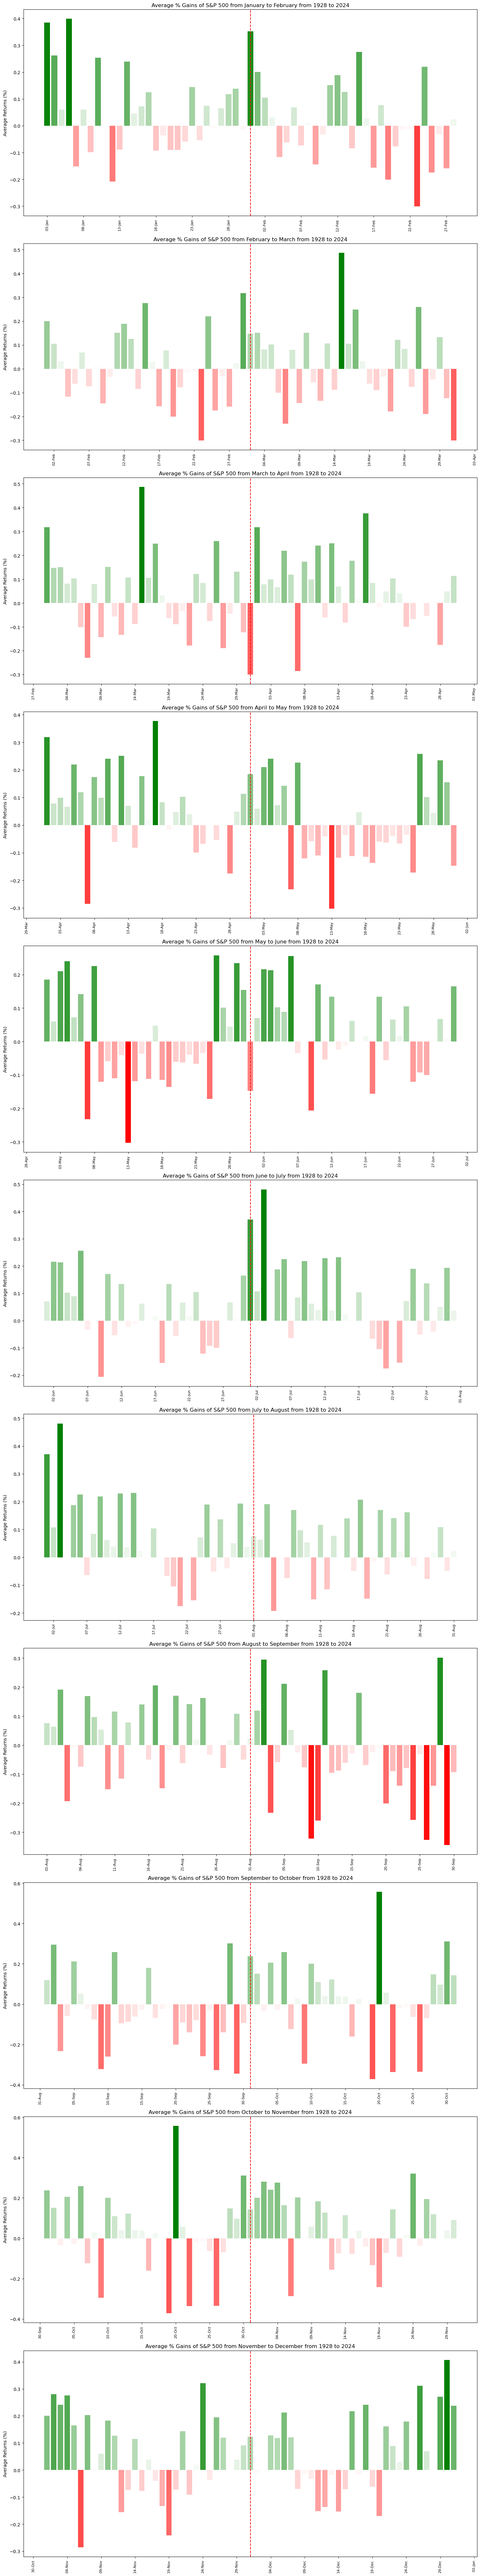

In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import calendar 

# Data acquisition
start_date = '1928-01-01'
end_date = '2024-01-31' 
ticker_symbol = '^GSPC'
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500.reset_index(inplace=True)
sp500['Prev_Close'] = sp500.groupby(sp500['Date'].dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100
sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day


fig = plt.figure(figsize=(15, 80))
gs = gridspec.GridSpec(11, 1)  

for i in range(11):  
    start_month = i + 1
    end_month = start_month % 12 + 1

    sp500_monthly = sp500[(sp500['Month'] == start_month) | (sp500['Month'] == end_month)]
        
    
    avg_returns = sp500_monthly.groupby(['Month', 'Day'], as_index=False)['Return'].mean()
    avg_returns['Year'] = 2023 if end_month != 1 else 2024

   
    valid_days = avg_returns.apply(lambda row: calendar.monthrange(int(row['Year']), int(row['Month']))[1], axis=1)
    avg_returns = avg_returns[(avg_returns['Day'] >= 1) & (avg_returns['Day'] <= valid_days)]


    avg_returns['Date'] = pd.to_datetime({'year': avg_returns['Year'], 'month': avg_returns['Month'], 'day': avg_returns['Day']})


    vmax = avg_returns['Return'].abs().max()
    cmap = colors.LinearSegmentedColormap.from_list("", ["red", "white", "green"])
    norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)


    ax = fig.add_subplot(gs[i, 0])
    ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))
    ax.set_title(f'Average % Gains of S&P 500 from {pd.to_datetime(f"2023-{start_month}-01").strftime("%B")} to {pd.to_datetime(f"2023-{end_month}-01").strftime("%B")} from 1928 to 2024')

    # Formatting the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=15))
    date_format = DateFormatter("%d-%b")
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=90, fontsize=8)
    ax.set_ylabel('Average Returns (%)')

    center_date = avg_returns['Date'].iloc[len(avg_returns) // 2]
    ax.axvline(center_date, color='red', linestyle='--')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


    Month  Day    Return  Year
0       1    2       NaN  2023
1       1    3  0.384939  2023
2       1    4  0.261504  2023
3       1    5  0.059504  2023
4       1    6  0.398661  2023
5       1    7 -0.151443  2023
6       1    8  0.059637  2023
7       1    9 -0.098410  2023
8       1   10  0.253689  2023
9       1   11  0.001184  2023
10      1   12 -0.207973  2023
11      1   13 -0.088802  2023
12      1   14  0.239748  2023
13      1   15  0.045110  2023
14      1   16  0.071736  2023
15      1   17  0.125158  2023
16      1   18 -0.092208  2023
17      1   19 -0.035834  2023
18      1   20 -0.090650  2023
19      1   21 -0.090928  2023
20      1   22 -0.059367  2023
21      1   23  0.144276  2023
22      1   24 -0.054780  2023
23      1   25  0.074850  2023
24      1   26 -0.008165  2023
25      1   27  0.065258  2023
26      1   28  0.117610  2023
27      1   29  0.138387  2023
28      1   30 -0.013563  2023
29      1   31  0.352187  2023
30      2    1  0.200408  2023
31      

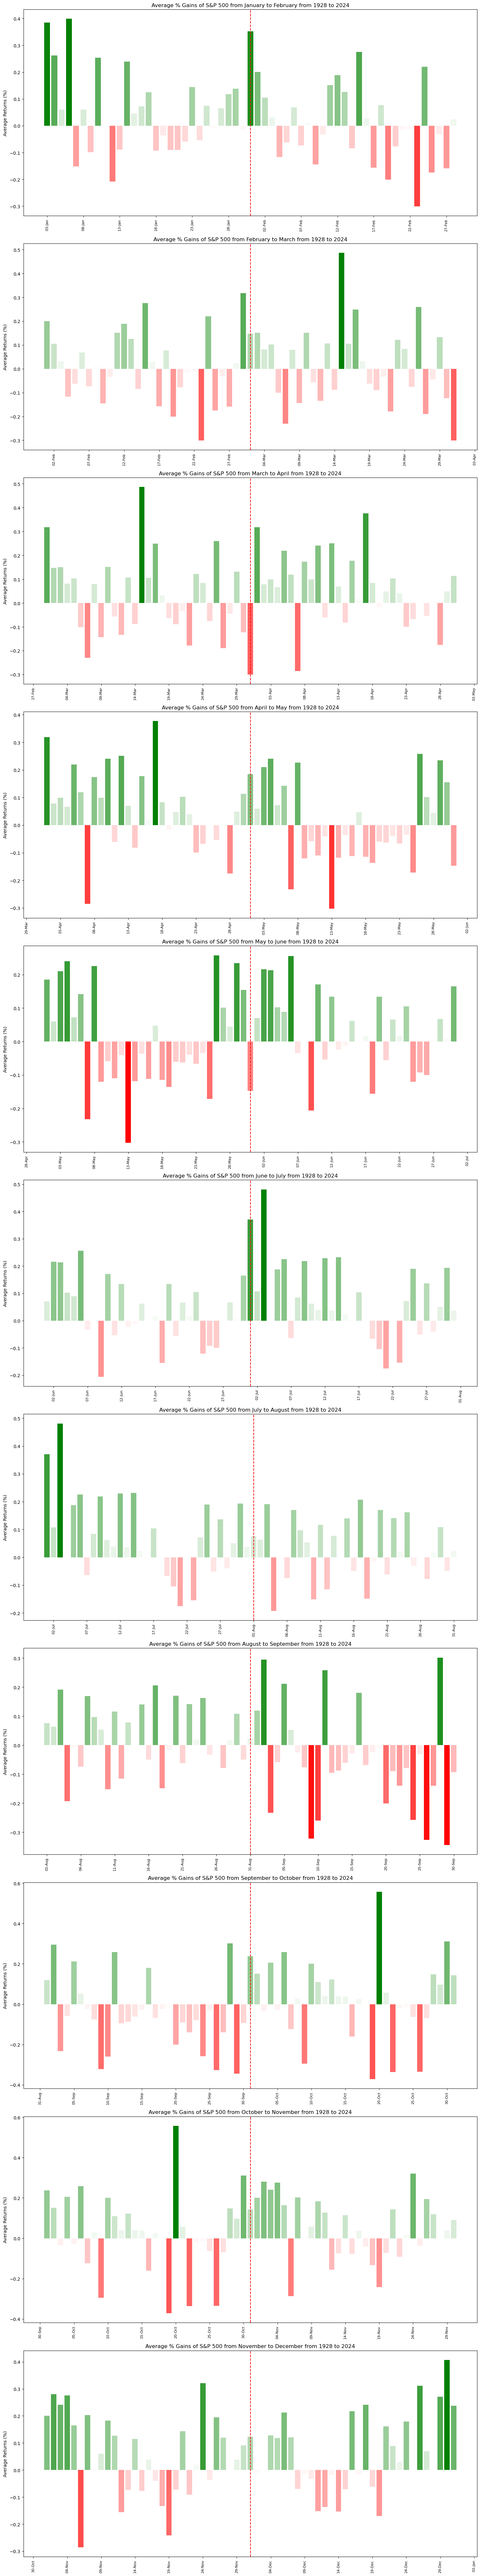

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import calendar 

# Data acquisition
start_date = '1928-01-01'
end_date = '2024-01-31'  
ticker_symbol = '^GSPC'
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500.reset_index(inplace=True)
sp500['Prev_Close'] = sp500.groupby(sp500['Date'].dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100
sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day

# Initialize the figure
fig = plt.figure(figsize=(15, 80))
gs = gridspec.GridSpec(11, 1)  

for i in range(11):  
    start_month = i + 1
    end_month = start_month % 12 + 1

    sp500_monthly = sp500[(sp500['Month'] == start_month) | (sp500['Month'] == end_month)]
        
    # Calculate average returns
    avg_returns = sp500_monthly.groupby(['Month', 'Day'], as_index=False)['Return'].mean()
    

    avg_returns['Year'] = 2023 if end_month != 1 else 2024
    

    print(avg_returns)
    
    # Filter out day values that are out of range for their respective months
    valid_days = avg_returns.apply(lambda row: calendar.monthrange(int(row['Year']), int(row['Month']))[1], axis=1)
    avg_returns = avg_returns[(avg_returns['Day'] >= 1) & (avg_returns['Day'] <= valid_days)]

    
    avg_returns['Date'] = pd.to_datetime({'year': avg_returns['Year'], 'month': avg_returns['Month'], 'day': avg_returns['Day']})


    vmax = avg_returns['Return'].abs().max()
    cmap = colors.LinearSegmentedColormap.from_list("", ["red", "white", "green"])
    norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

    ax = fig.add_subplot(gs[i, 0])
    ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))
    ax.set_title(f'Average % Gains of S&P 500 from {pd.to_datetime(f"2023-{start_month}-01").strftime("%B")} to {pd.to_datetime(f"2023-{end_month}-01").strftime("%B")} from 1928 to 2024')


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=15))
    date_format = DateFormatter("%d-%b")
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=90, fontsize=8)
    ax.set_ylabel('Average Returns (%)')
  
    center_date = avg_returns['Date'].iloc[len(avg_returns) // 2]
    ax.axvline(center_date, color='red', linestyle='--')

plt.tight_layout()
plt.show()
